# [Playing with Pandas via SF Salaries](https://www.kaggle.com/danielviray/d/kaggle/sf-salaries/playing-with-pandas-via-sf-salaries/discussion)

by DanielViray

본 tutorial은 Kaggle.com에 소개된 San Francisco city employee salary data를 python pandas 패키지를 사용해 분석해보는 예제입니다. 14만개의 데이터를 다루는, 좀 더 실전적인 연습을 할 수 있을 것입니다.

본 tutorial은 python 3.X 기준으로 작성되었습니다. 만약 아래 python 버전 확인 명령 결과가 python 2.X 라면 콘솔에서

    $ conda create -n dsci3 python=3 pandas matplotlib jupyter

명령을 실행해 python 3.X 버전 환경에서 실습하셔야 합니다.

In [1]:
# python 버전 확인
import sys
sys.version

'3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) \n[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]'

## Data 불러오기

[San Francisco city employee salary data](https://www.kaggle.com/kaggle/sf-salaries)를 `~/Downloads` 폴더에 다운로드 받아서 압축을 풀고 `~/Downloads/output` 폴더에 `Salaries.csv` 파일이 있는지 확인하세요.

In [6]:
# Salaries.csv 파일이 ~/Downloads 폴더에 있는지 확인
!ls -al ~/Downloads/output/Salaries.csv

-rw-r--r--@ 1 KIKIM  staff  16257213 12 20  2015 /Users/KIKIM/Downloads/output/Salaries.csv


In [7]:
'''My goal for this script was to get more familiar using pandas in Python via the SF salaries data set. Also, there are some interesting statistics on SF salaries.''' 

% matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''Exploratory Data Analysis'''
'''Initial Inspection'''

#read in data, with 'Id' as index_col
df = pd.read_csv("~/Downloads/output/Salaries.csv", index_col = 'Id')

#let's see what we're working with
print ("Data types:\n\n", df.dtypes, "\n")
print ("Dimension of df:\n\n", df.shape, "\n")

#preview
df[:5]

Data types:

 EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object 

Dimension of df:

 (148654, 12) 



/Users/KIKIM/anaconda3/envs/dsci3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Data Cleaning

In [8]:
#check how many NaN values there are in each column
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [9]:
#delete unnecessary features

#delete employee name, for sake of privacy 
del df['EmployeeName']

#delete notes, 'Notes' column in empty 
del df['Notes']

#delete 'Agency' column; all jobs are in SF
del df['Agency']

#delete any observation where JobTitle is 'Not provided'
df = df[df.JobTitle != 'Not provided']

#if 'Benefits' are NaN, fill with 0
df['Benefits'].fillna(0, inplace=True)

#Replace NaN status with "Unknown", since we don't know if its FT or PT work
df['Status'].fillna("Unknown", inplace=True)

#drop all rows with NaN values
#all missing values are in "BasePay" column
#We can afford to lose 605 observations of 148,654 obs. 
df.dropna(inplace=True)

In [10]:
#preview the clean data set

#no missing values
print (df.isnull().sum())

#preview data set
print (df.head(), "\n\n")
print (df.tail())

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Status              0
dtype: int64
                                          JobTitle BasePay OvertimePay  \
Id                                                                       
1   GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411           0   
2                  CAPTAIN III (POLICE DEPARTMENT)  155966      245132   
3                  CAPTAIN III (POLICE DEPARTMENT)  212739      106088   
4             WIRE ROPE CABLE MAINTENANCE MECHANIC   77916     56120.7   
5     DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134402        9737   

   OtherPay Benefits   TotalPay  TotalPayBenefits  Year   Status  
Id                                                                
1    400184        0  567595.43         567595.43  2011  Unknown  
2    137811        0  538909.28         538909.28  2011  Unknown  
3 

## Exploratory Data Analysis

### Top 10 Most Common Jobs in SF

Transit Operator                6975
Special Nurse                   4382
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Custodian                       2409
TRANSIT OPERATOR                2388
Firefighter                     2348
Recreation Leader               1968
Patient Care Assistant          1940
Name: JobTitle, dtype: int64


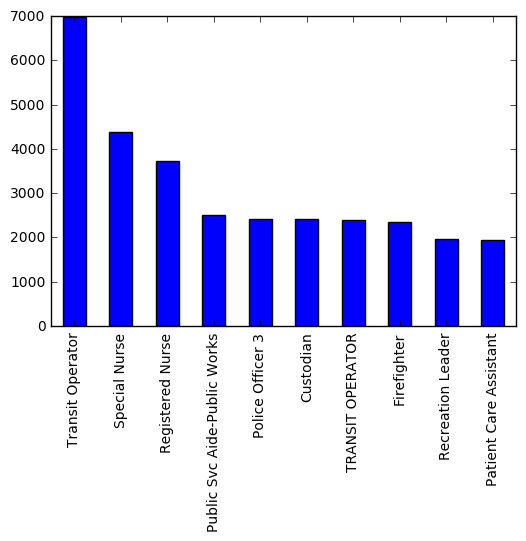

In [11]:
#sum each type of observation in 'JobTitle'
job_title_counts = df['JobTitle'].value_counts()[:10]
print (job_title_counts)

#plot bar graph
job_title_counts.plot(kind = 'bar')

### Top 10 Jobs in 2014 that pay over 300k in total

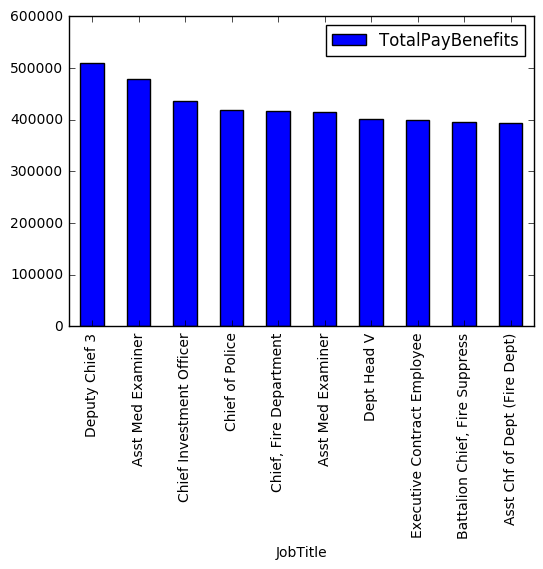

In [12]:
#filter: over 300k 
over_300k = df['TotalPayBenefits'] > 300000

#filter: year 2014
year_2014 = df['Year'] == 2014

#apply filters to dataframe, selecting only specific features
jobs_over_300k_in_2014 = df[over_300k & year_2014][['JobTitle','TotalPayBenefits', 'Year']]
top_10_jobs_over_300k_in_2014 = jobs_over_300k_in_2014[:10]

top_10_jobs_over_300k_in_2014.plot(x='JobTitle', y='TotalPayBenefits', kind='bar')

### Distribution of top 30 jobs that pay over 300k, in 2014

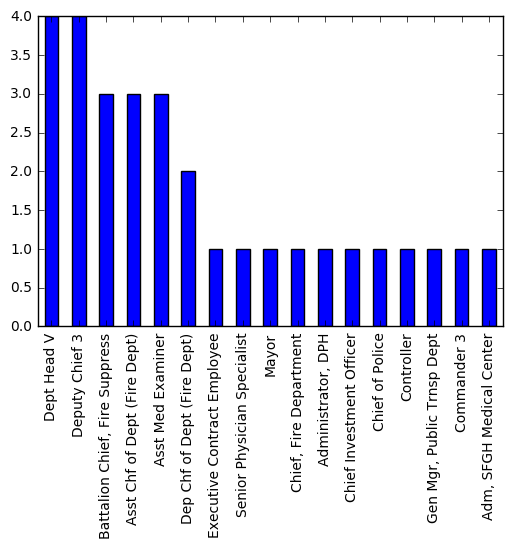

In [13]:
# 이거 좀 이상함

top_30_jobs = jobs_over_300k_in_2014[['JobTitle', 'TotalPayBenefits']][:30]
dist_top_30_jobs = top_30_jobs['JobTitle'].value_counts()
dist_top_30_jobs
dist_top_30_jobs.plot(x = 'JobTitle', kind = 'bar')

### Distribution of SF Income in 2014

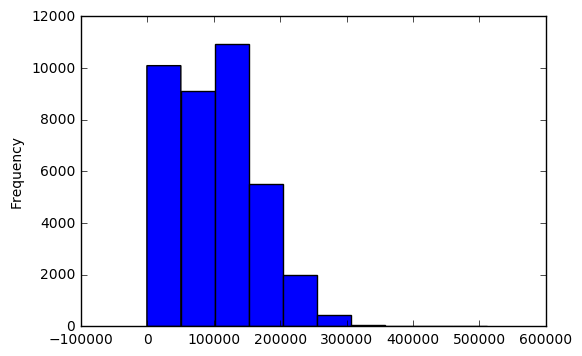

In [14]:
#filter: total pay benefits in 2014
income_2014 = df[year_2014]['TotalPayBenefits']
income_2014.plot(kind='hist')

### Percent BasePay of TotalPayBenefits

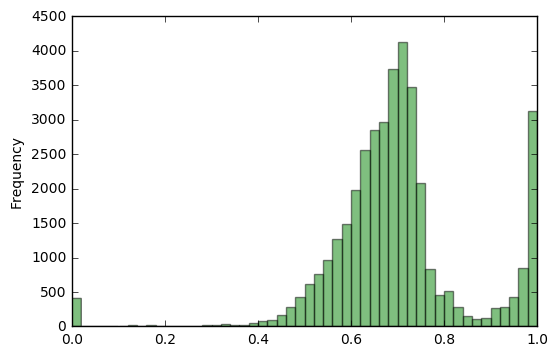

In [15]:
#create filters and store in data frame
base_pay = df[year_2014]['BasePay']
total_pay_benefits = df[year_2014]['TotalPayBenefits']

#calculate percent BasePay of TotalPayBenefits
percent_base = base_pay.astype(float) / total_pay_benefits.astype(float)

#Plot as histogram
percent_base.plot.hist(color='g', alpha = 0.5, bins = 50)

### Aggregate Sum of SF Income

In [16]:
#create df with only Total Pay Column
df_totalpay = df['TotalPayBenefits']

#Aggregate Sum of SF Income, by year
year_counts = df.groupby('Year').aggregate(sum)
print (year_counts, "\n")

#Aggreate Sum of SF Income, by job
job_counts = df.groupby('JobTitle').aggregate(sum)
print (job_counts)

          TotalPay  TotalPayBenefits
Year                                
2011  2.594195e+09      2.594195e+09
2012  2.724848e+09      3.696940e+09
2013  2.915985e+09      3.808882e+09
2014  2.876911e+09      3.821866e+09 

                                                       TotalPay  \
JobTitle                                                          
ACCOUNT CLERK                                        3654960.14   
ACCOUNTANT                                            237146.34   
ACCOUNTANT INTERN                                    1393523.66   
ACPO,JuvP, Juv Prob (SFERS)                            62290.78   
ACUPUNCTURIST                                          67594.40   
ADMINISTRATIVE ANALYST                               5947802.68   
ADMINISTRATIVE ANALYST II                             122994.07   
ADMINISTRATIVE ANALYST III                            185397.03   
ADMINISTRATIVE ENGINEER                              1279614.30   
ADMINISTRATIVE SERVICES MANAGER        